In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("Doceree-HCP_Train.csv",engine='python',encoding='latin1')

In [3]:
data.head(5)

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0.0
2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1.0
4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,NaN,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38514 entries, 0 to 38513
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               38514 non-null  int64  
 1   DEVICETYPE       38514 non-null  object 
 2   PLATFORM_ID      38514 non-null  int64  
 3   BIDREQUESTIP     38514 non-null  object 
 4   USERPLATFORMUID  38514 non-null  object 
 5   USERCITY         36388 non-null  object 
 6   USERZIPCODE      36970 non-null  float64
 7   USERAGENT        38513 non-null  object 
 8   PLATFORMTYPE     38514 non-null  object 
 9   CHANNELTYPE      38514 non-null  object 
 10  URL              38514 non-null  object 
 11  KEYWORDS         38514 non-null  object 
 12  TAXONOMY         10963 non-null  object 
 13  IS_HCP           38513 non-null  float64
dtypes: float64(2), int64(2), object(10)
memory usage: 4.1+ MB


# **Data Cleaning**

In [5]:
data.drop(columns=['PLATFORMTYPE','TAXONOMY','DEVICETYPE','PLATFORM_ID','BIDREQUESTIP','USERPLATFORMUID','USERCITY','USERZIPCODE','USERAGENT','CHANNELTYPE','URL'],inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38514 entries, 0 to 38513
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        38514 non-null  int64  
 1   KEYWORDS  38514 non-null  object 
 2   IS_HCP    38513 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 902.8+ KB


In [7]:
data.isnull().sum()

ID          0
KEYWORDS    0
IS_HCP      1
dtype: int64

In [8]:
data.dropna(inplace=True)
data.isnull().sum()

ID          0
KEYWORDS    0
IS_HCP      0
dtype: int64

# **EDA**

In [9]:
target=pd.DataFrame()
target['IS_HCP']=data['IS_HCP']

In [10]:
target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38513 entries, 0 to 38512
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IS_HCP  38513 non-null  float64
dtypes: float64(1)
memory usage: 601.8 KB


In [11]:
target['IS_HCP']=target['IS_HCP'].astype(int)

In [13]:
data.drop(columns=["IS_HCP"],inplace=True)

In [14]:
data.head()

,ID,KEYWORDS
0,1001,General|Endocrine|False|Medicine|Surgery|Urolo...
1,1002,Bone Marrow|Radiography|Chronic|Oncology|Psych...
2,1003,General|Endocrine|False|Medicine|Surgery|Urolo...
3,1004,Dental|Total|Clinical|Pharmacology|Physicians|...
4,1005,Critical Care|Emergency Medicine|General Pract...


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38513 entries, 0 to 38512
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        38513 non-null  int64 
 1   KEYWORDS  38513 non-null  object
dtypes: int64(1), object(1)
memory usage: 902.6+ KB


In [16]:
target['IS_HCP'].value_counts()

0    26913
1    11600
Name: IS_HCP, dtype: int64

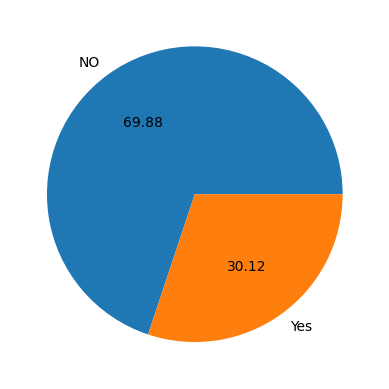

In [17]:
import matplotlib.pyplot as plt
plt.pie(target['IS_HCP'].value_counts(), labels=['NO','Yes'],autopct="%0.2f")
plt.show()

# **Data Preprocessing**

In [18]:
data['KEYWORDS'] = data['KEYWORDS'].apply(lambda x:x.split("|"))

In [19]:
data.head()

,ID,KEYWORDS
0,1001,"[General, Endocrine, False, Medicine, Surgery,..."
1,1002,"[Bone Marrow, Radiography, Chronic, Oncology, ..."
2,1003,"[General, Endocrine, False, Medicine, Surgery,..."
3,1004,"[Dental, Total, Clinical, Pharmacology, Physic..."
4,1005,"[Critical Care, Emergency Medicine, General Pr..."


In [20]:
data['num_words'] = data['KEYWORDS'].apply(lambda x:len(x))

In [21]:
data.head()

,ID,KEYWORDS,num_words
0,1001,"[General, Endocrine, False, Medicine, Surgery,...",20
1,1002,"[Bone Marrow, Radiography, Chronic, Oncology, ...",40
2,1003,"[General, Endocrine, False, Medicine, Surgery,...",20
3,1004,"[Dental, Total, Clinical, Pharmacology, Physic...",9
4,1005,"[Critical Care, Emergency Medicine, General Pr...",56


In [22]:
data['KEYWORDS'] = data['KEYWORDS'].apply(lambda x:' '.join(map(str, x)))

In [23]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=1094)
tfidf_test = TfidfVectorizer()

In [24]:
X = tfidf.fit_transform(data['KEYWORDS']).toarray()

In [25]:
print(len(tfidf.vocabulary_))

1094


In [26]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05868636, 0.        , 0.        , ..., 0.        , 0.        ,
        0.42916957]])

# **Model Building**

In [27]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [28]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [29]:
X_train=X
y_train=target

In [30]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_train)
print(accuracy_score(y_train,y_pred1))
print(confusion_matrix(y_train,y_pred1))
print(precision_score(y_train,y_pred1))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6658790538259808
[[14230 12683]
 [  185 11415]]
0.4736907627188978


# **Prediction on Test Data**

In [31]:
data_test=pd.read_csv("Doceree-HCP_Test.csv",engine='python',encoding='latin1')
data_test.head(10)
data_test.drop(columns=['DEVICETYPE','PLATFORM_ID','BIDREQUESTIP','USERPLATFORMUID','USERCITY','USERZIPCODE','USERAGENT','CHANNELTYPE','URL'],inplace=True)
data_test['KEYWORDS'] = data_test['KEYWORDS'].apply(lambda x:x.split("|"))
data_test['num_words'] = data_test['KEYWORDS'].apply(lambda x:len(x))
data_test['KEYWORDS'] = data_test['KEYWORDS'].apply(lambda x:' '.join(map(str, x)))
X_test = tfidf_test.fit_transform(data_test['KEYWORDS']).toarray()

In [32]:
y_pred1 = gnb.predict(X_test)

In [34]:
y_pred1=pd.DataFrame(y_pred1)
y_pred1['ID']=data_test["ID"]

In [35]:
y_pred1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28493 entries, 0 to 28492
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       28493 non-null  int64
 1   ID      28493 non-null  int64
dtypes: int64(2)
memory usage: 445.3 KB


In [36]:
y_pred1.rename(columns = {0:'IS_HCP'}, inplace = True)
y_pred1.head()

,IS_HCP,ID
0,1,115501
1,0,115502
2,0,115503
3,0,115504
4,0,115505


In [37]:
y_pred1['IS_HCP'].value_counts()

0    21518
1     6975
Name: IS_HCP, dtype: int64

In [38]:
y_pred1=y_pred1.reindex(columns=['ID',"IS_HCP"])

In [39]:
y_pred1.head()

,ID,IS_HCP
0,115501,1
1,115502,0
2,115503,0
3,115504,0
4,115505,0


# **OUTPUT File**

In [52]:
y_pred1.to_csv('Doceree-HCP_Output.csv',index=False)